In [ ]:
#imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import preprocessing
import visualizations
from getfile import getfile
if not os.path.isfile('sbcdata.csv'):
    getfile()


In [ ]:
#processing

file_path = r'sbcdata.csv'
df = pd.read_csv(file_path)

# #if you want the files to be saved set save_csv to true
df_uml, df_umg = preprocessing.preprocess(df, save_csv=False)

Count of each target variable before preprop: Diagnosis
0.0    1776380
1.0     251395
Name: count, dtype: int64
Count of each target variable after dropping na and duplicates: Diagnosis
0.0    1673822
1.0     243123
Name: count, dtype: int64
Count of each target variable after outlier removal: Diagnosis
0.0    1521216
1.0     184955
Name: count, dtype: int64
Length of X_df after scaling: 1706171
Count of each target variable after rescaling: Diagnosis
0.0    1521216
1.0     184955
Name: count, dtype: int64
Count of each target variable before undersampling: Diagnosis
0.0    1521216
1.0     184955
Name: count, dtype: int64
Count of each target variable after undersampling: Diagnosis
0.0    184955
1.0    184955
Name: count, dtype: int64
Count of each target variable before preprop: Diagnosis
0.0    526943
1.0    128578
Name: count, dtype: int64
Count of each target variable after dropping na and duplicates: Diagnosis
0.0    513133
1.0    122511
Name: count, dtype: int64
Count of each tar

In [12]:
def train_eval_model(model, df_val, df_train):
         

    X = df_train.drop(columns=['Diagnosis'])
    y = df_train['Diagnosis']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics_train = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, average="weighted"),
    "recall": recall_score(y_test, y_pred, average="weighted"),
    "f1_score": f1_score(y_test, y_pred, average="weighted"),
    "confusion_matrix": confusion_matrix(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], multi_class="ovr", average="weighted"),
    "model" : model
    
    }

    X_val = df_val.drop(columns=['Diagnosis'])
    y_val = df_val['Diagnosis']
    y_val_pred = model.predict(X_val)

    metrics_val = {
    "accuracy": accuracy_score(y_val, y_val_pred),
    "precision": precision_score(y_val, y_val_pred, average="weighted"),
    "recall": recall_score(y_val, y_val_pred, average="weighted"),
    "f1_score": f1_score(y_val, y_val_pred, average="weighted"),
    "confusion_matrix": confusion_matrix(y_val, y_val_pred),
    "roc_auc": roc_auc_score(y_val, model.predict_proba(X_val)[:, 1], multi_class="ovr", average="weighted"),
    "model" : model
    
    }
    return metrics_train, metrics_val

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'}


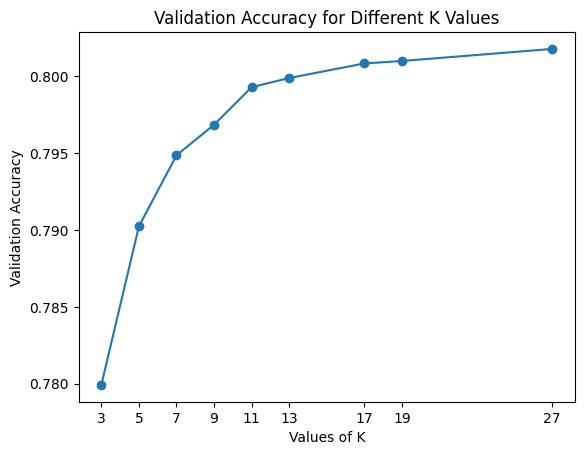

In [ ]:
X = df_uml.drop(columns=['Diagnosis'])
y = df_uml['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 17, 19, 27],
    'weights': ['distance'],
    'metric': ['manhattan']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# y_pred_best = best_knn.predict(X_test)

k_range = [3, 5, 7, 9, 11, 13, 17, 19, 27]
accuracy_scores = []

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(k_range, accuracy_scores, marker='o')
plt.title('Validation Accuracy for Different K Values')
plt.xlabel('Values of K')
plt.ylabel('Validation Accuracy')
plt.xticks(k_range)
plt.show()


metrics_train, metrics_val = train_eval_model(model=best_knn, df_train=df_uml, df_val=df_umg)

print("Training Metrics:")
print(f"Accuracy:     {metrics_train['accuracy']:.4f}")
print(f"Recall:       {metrics_train['recall']:.4f}")
print(f"F1 Score:     {metrics_train['f1_score']:.4f}")
print(f"ROC AUC:      {metrics_train['roc_auc']:.4f}")

print("Validation Metrics:")
print(f"Accuracy:     {metrics_val['accuracy']:.4f}")
print(f"Recall:       {metrics_val['recall']:.4f}")
print(f"F1 Score:     {metrics_val['f1_score']:.4f}")
print(f"ROC AUC:      {metrics_val['roc_auc']:.4f}")

visualizations.plot_confusion_matrix(metrics_train)
visualizations.plot_roc_curves(df1=df_uml, df2=df_umg, model_metrics=metrics_train)


Training Metrics:
Accuracy:     0.8066
Recall:       0.8066
F1 Score:     0.8063
ROC AUC:      0.8876
Validation Metrics:
Accuracy:     0.7165
Recall:       0.7165
F1 Score:     0.7162
ROC AUC:      0.7890


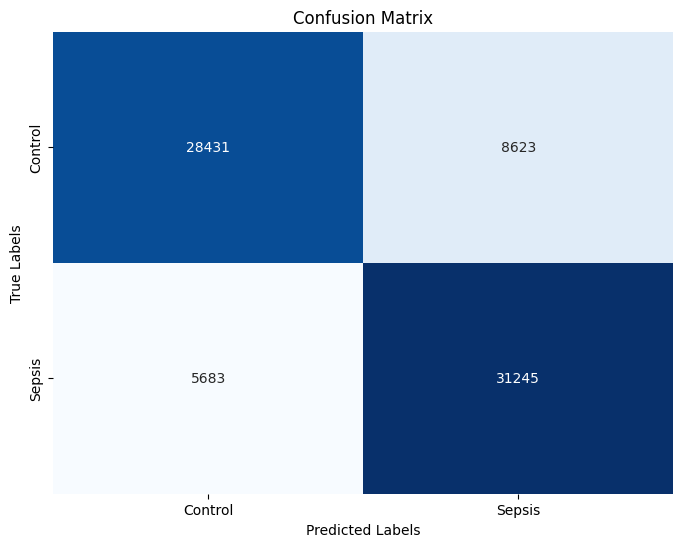

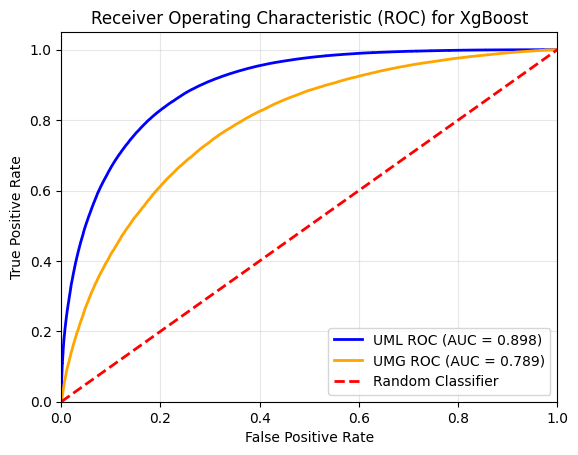

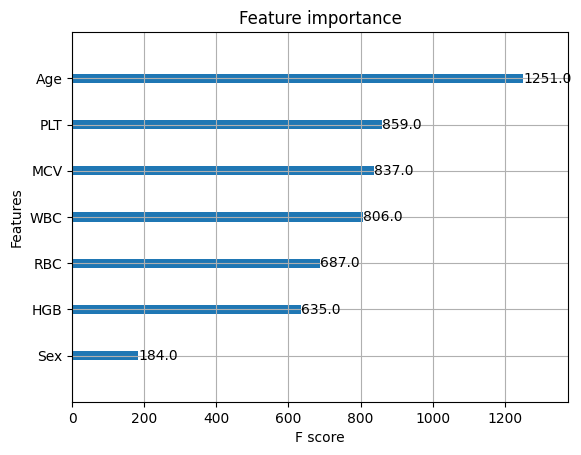

In [15]:
#put random forest here

#Hyperparamenter tunning
#param_grid = {'n_estimators': [100, 200, 250, 300], 
#              'max_features': ['sqrt', 'log2', None], 
#              'max_depth': [3, 6, 9, 20, None], 
#              'min_samples_split': [2,10,15]
#} 
#grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid) 
#grid_search.fit(X_train, y_train) 
#print(grid_search.best_estimator_) 

rf_model = RandomForestClassifier(n_estimators = 200,
                                  random_state = 42, 
                                  n_jobs = -1,
                                  class_weight='balanced'
)

metrics_train, metrics_val = train_eval_model(model=model, df_train=df_uml, df_val=df_umg)

print("Training Metrics:")
print(f"Accuracy:     {metrics_train['accuracy']:.4f}")
print(f"Recall:       {metrics_train['recall']:.4f}")
print(f"F1 Score:     {metrics_train['f1_score']:.4f}")
print(f"ROC AUC:      {metrics_train['roc_auc']:.4f}")

print("Validation Metrics:")
print(f"Accuracy:     {metrics_val['accuracy']:.4f}")
print(f"Recall:       {metrics_val['recall']:.4f}")
print(f"F1 Score:     {metrics_val['f1_score']:.4f}")
print(f"ROC AUC:      {metrics_val['roc_auc']:.4f}")

visualizations.plot_confusion_matrix(metrics_train)
visualizations.plot_roc_curves(df1=df_uml, df2=df_umg, model_metrics=metrics_train)
visualizations.plot_feature_importance(metrics_train)

Training Metrics:
Accuracy:     0.8066
Recall:       0.8066
F1 Score:     0.8063
ROC AUC:      0.8876
Validation Metrics:
Accuracy:     0.7165
Recall:       0.7165
F1 Score:     0.7162
ROC AUC:      0.7890


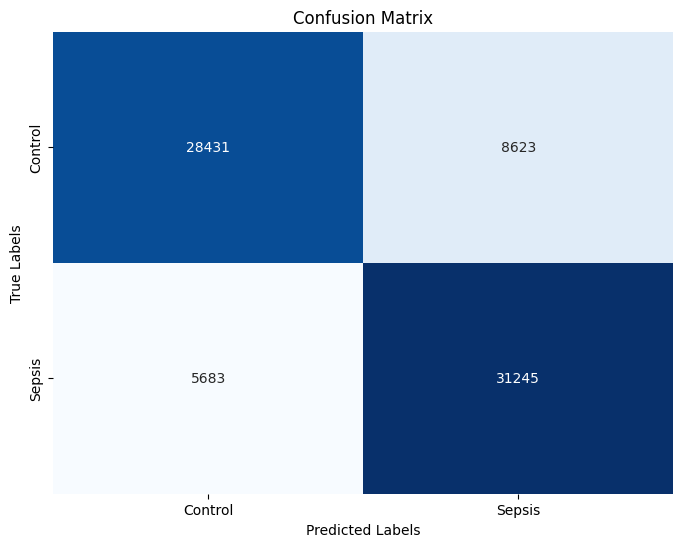

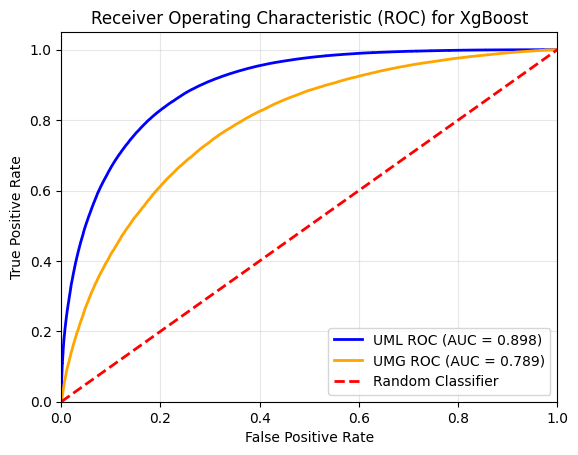

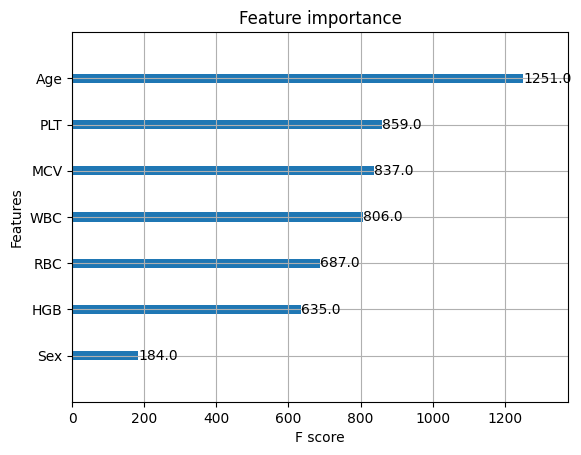

In [16]:
#put xgboost here
model = xgb.XGBClassifier()

metrics_train, metrics_val = train_eval_model(model=model, df_train=df_uml, df_val=df_umg)

print("Training Metrics:")
print(f"Accuracy:     {metrics_train['accuracy']:.4f}")
print(f"Recall:       {metrics_train['recall']:.4f}")
print(f"F1 Score:     {metrics_train['f1_score']:.4f}")
print(f"ROC AUC:      {metrics_train['roc_auc']:.4f}")

print("Validation Metrics:")
print(f"Accuracy:     {metrics_val['accuracy']:.4f}")
print(f"Recall:       {metrics_val['recall']:.4f}")
print(f"F1 Score:     {metrics_val['f1_score']:.4f}")
print(f"ROC AUC:      {metrics_val['roc_auc']:.4f}")

visualizations.plot_confusion_matrix(metrics_train)
visualizations.plot_roc_curves(df1=df_uml, df2=df_umg, model_metrics=metrics_train)
visualizations.plot_feature_importance(metrics_train)